In [1]:
import pandas as pd
import os

In [2]:
from openpyxl import load_workbook

### Select Data Source

In [3]:
files= os.listdir('./SalesAnalysis/Sales_Data')

### Remove Unwanted Files

In [4]:
files=files[1:]

## Merge Data from all files

In [5]:
all_data=pd.DataFrame()
for file in files:
    data=pd.read_csv('./SalesAnalysis/Sales_Data/'+file)
    all_data=pd.concat([all_data,data])

In [6]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Remove rows containing headings

In [7]:
all_data=all_data.loc[all_data['Quantity Ordered']!='Quantity Ordered']

# Question 1: What month has maximum Sales?

### Extract Day and Month from Datetime column

In [8]:
all_data['Order Day']=pd.DatetimeIndex(all_data['Order Date']).day

all_data['Order Month']=pd.DatetimeIndex(all_data['Order Date']).month

all_data.dropna(how='all',inplace=True)

## Create a Calculated Column of Sales

In [9]:
all_data['Quantity Ordered']=pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each']=pd.to_numeric(all_data['Price Each'])
all_data['Sales']=all_data['Quantity Ordered']*all_data['Price Each']

### Best Sales Month

In [10]:
bsm=all_data.groupby('Order Month').sum()
bsm

,Quantity Ordered,Price Each,Order Day,Sales
Order Month,,,,
1.0,10903,1.811768e+06,155814.0,1.822257e+06
2.0,13449,2.188885e+06,174408.0,2.202022e+06
3.0,17005,2.791208e+06,241774.0,2.807100e+06
4.0,20558,3.367671e+06,282960.0,3.390670e+06
5.0,18667,3.135125e+06,264875.0,3.152607e+06
6.0,15253,2.562026e+06,209880.0,2.577802e+06
7.0,16072,2.632540e+06,227910.0,2.647776e+06
8.0,13448,2.230345e+06,192315.0,2.244468e+06
9.0,13109,2.084992e+06,180101.0,2.097560e+06


In [11]:
bsm['Sales'].plot.bar()

# Question 2: What City has maximum Sales?

### Extract City from Address
Lets use apply function



In [12]:
all_data['City']=all_data['Purchase Address'].apply(lambda x: x.split(',')[1])

In [13]:
all_data['LPin']=all_data['Purchase Address'].apply(lambda x: x.split(',')[2]).str[-5:]

In [14]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Day,Order Month,Sales,City,LPin
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",19.0,4.0,23.90,Dallas,75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",7.0,4.0,99.99,Boston,02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12.0,4.0,600.00,Los Angeles,90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12.0,4.0,11.99,Los Angeles,90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",30.0,4.0,11.99,Los Angeles,90001


In [15]:
all_data['Location']=all_data[['City','LPin']].apply(lambda x: " ".join(x),axis=1)

In [16]:
result=all_data.groupby('Location').sum().sort_values('Sales',ascending=False)

In [17]:
result

,Quantity Ordered,Price Each,Order Day,Order Month,Sales
Location,,,,,
San Francisco 94016,50239,8.211462e+06,702669.0,315520.0,8.262204e+06
Los Angeles 90001,33289,5.421435e+06,469607.0,208325.0,5.452571e+06
New York City 10001,27932,4.635371e+06,392706.0,175741.0,4.664317e+06
Boston 02215,22528,3.637410e+06,312376.0,141112.0,3.661642e+06
Atlanta 30301,16602,2.779908e+06,234837.0,104794.0,2.795499e+06
Dallas 75001,16730,2.752628e+06,234435.0,104620.0,2.767975e+06
Seattle 98101,16553,2.733296e+06,229552.0,104941.0,2.747755e+06
Portland 97035,11303,1.860558e+06,159233.0,70621.0,1.870732e+06
Austin 73301,11153,1.809874e+06,156782.0,69829.0,1.819582e+06


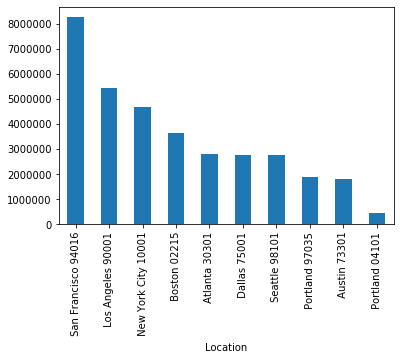

In [18]:
result['Sales'].plot.bar()

# What time advertisements should display to maximize sales?

In [19]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Day,Order Month,Sales,City,LPin,Location
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",19.0,4.0,23.90,Dallas,75001,Dallas 75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",7.0,4.0,99.99,Boston,02215,Boston 02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12.0,4.0,600.00,Los Angeles,90001,Los Angeles 90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",12.0,4.0,11.99,Los Angeles,90001,Los Angeles 90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",30.0,4.0,11.99,Los Angeles,90001,Los Angeles 90001


In [20]:
all_data['Order Date']=pd.to_datetime(all_data['Order Date'])

In [21]:
all_data['Order Time']=all_data['Order Date'].apply(lambda x: x.time().hour)

In [22]:
adtime=all_data.groupby('Order Time').sum()
adtime

,Quantity Ordered,Price Each,Order Day,Order Month,Sales
Order Time,,,,,
0,4428,709296.70,62015.0,27554.0,713721.27
1,2619,458490.00,37333.0,16657.0,460866.88
2,1398,233833.64,19631.0,8507.0,234851.44
3,928,144726.42,13430.0,5904.0,145757.89
4,937,162058.18,13756.0,6148.0,162661.01
5,1493,229621.21,21347.0,9301.0,230679.82
6,2810,445000.11,39824.0,17539.0,448113.00
7,4556,740568.11,63111.0,28850.0,744854.12
8,7002,1185970.62,98078.0,43626.0,1192348.97


In [23]:
z=all_data['Order Time'].unique()
z

array([ 8, 22, 14,  9, 13,  7, 10, 17, 12, 19, 15, 20, 18,  0, 11, 23, 21,
        4, 16,  5,  2,  1,  6,  3], dtype=int64)

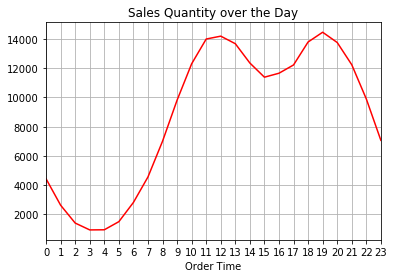

In [25]:
adtime['Quantity Ordered'].plot(xticks=z,color='r',title='Sales Quantity over the Day',grid=True)

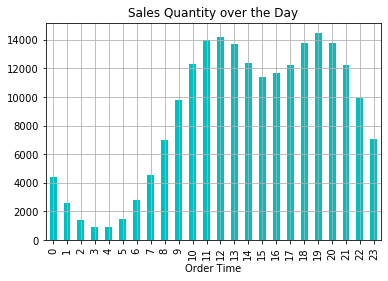

In [32]:
adtime['Quantity Ordered'].plot.bar(xticks=z,color='c',title='Sales Quantity over the Day',grid=True)